## Group 3
Sentongo Paul----B00327---

Nankya Magret peninah---M23MD10/255

Jjunju Karim

Ochom Joseph

Kawuki Tonny

In [ ]:
# Importing essential libraries for machine learning, especially regression
import numpy as np           # NumPy for numerical operations
import pandas as pd          # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns        # Seaborn for data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression     # Linear regression
from sklearn.metrics import mean_squared_error, r2_score  # Regression metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows=None

to visualise the shape of our dataset

In [ ]:
data.shape

(46839, 84)

checking for duplicates in the dataset

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.duplicated().sum().T

0

In [ ]:
data.isnull().sum()

barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders            603
displ                601
drive               1186
engId                  0
eng_dscr           17229
feScore                0
fuelCost08             0
fuelCostA08            0
fuelType               0
fuelType1              0
ghgScore               0
ghgScoreA              0
highway08              0
highway08U             0
highwayA08             0
highwayA08U            0
highwayCD              0
highwayE               0


In [ ]:
missing_columns=data.columns[data.isnull().any()]
missing_columns

Index(['cylinders', 'displ', 'drive', 'eng_dscr', 'mpgData', 'trany',
       'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2',
       'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop'],
      dtype='object')

In [ ]:
missing_values_data=data[missing_columns]
missing_values_data.shape

(46839, 18)

In [ ]:
missing_values_data.describe(include="all")

,cylinders,displ,drive,eng_dscr,mpgData,trany,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,startStop
count,46236.000000,46238.000000,45653,29610,46837,46828,2746,15044,10014,1001,4987,1873,1868,2119,16031,141,135,15150
unique,NaN,NaN,7,600,2,40,3,52,1,1,8,4,249,334,55,5,7,2
top,NaN,NaN,Front-Wheel Drive,(FFS),N,Automatic 4-spd,G,CLKUP,T,S,FFV,E85,290,48V Li-Ion,GMX,standard charger,80 amp dual charger,N
freq,NaN,NaN,15379,8827,32731,11048,1767,7809,10014,1001,1520,1520,74,312,2319,130,55,8343
mean,5.705532,3.276186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.773175,1.355555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000000,2.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.000000,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


imputing the missing values with the mode

In [ ]:
def mode_value(missing_values):
    for columns in missing_values:
        if missing_values[columns].dtype=="object":
           missing_values[columns].fillna(missing_values[columns].mode()[0],inplace=True)
        else:
            missing_values[columns].fillna(missing_values[columns].mode()[0],inplace=True)

In [ ]:
mode_value(data)

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,46839.000000,46839.000000,46839.0,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,...,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000,46839.000000
mean,15.254678,0.190728,0.0,0.137831,19.350755,8.321708,0.878819,0.740117,0.000501,0.800725,...,24.618617,1.170996,35.637203,0.961148,2004.014902,-5538.541600,0.015660,0.298512,0.301544,0.298533
std,4.395047,0.978736,0.0,1.118495,11.026435,14.299800,6.690077,6.476217,0.036873,6.002955,...,15.747436,9.455378,14.200534,6.368523,12.394946,4428.850517,0.323361,3.940135,3.815051,3.858476
min,0.047081,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-39000.000000,0.000000,0.000000,0.000000,0.000000
25%,12.396250,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.602400,0.000000,28.100000,0.000000,1992.000000,-8250.000000,0.000000,0.000000,0.000000,0.000000
50%,14.875500,0.000000,0.0,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,0.000000,33.800000,0.000000,2005.000000,-5500.000000,0.000000,0.000000,0.000000,0.000000
75%,17.500588,0.000000,0.0,0.000000,21.000000,17.272750,0.000000,0.000000,0.000000,0.000000,...,26.600000,0.000000,39.898600,0.000000,2015.000000,-2750.000000,0.000000,0.000000,0.000000,0.000000
max,42.501429,16.528333,0.0,19.000000,153.000000,155.824200,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,187.100000,173.143600,2024.000000,7000.000000,9.600000,97.000000,81.000000,89.000000


In [ ]:
data.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'baseModel',
       'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2',
       'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn'

In [ ]:
# Creating a target variable 'fuel_consumption' based on known factors
data['fuel_consumption'] = (data['cylinders'] * data['displ'] + data['year']) / 10

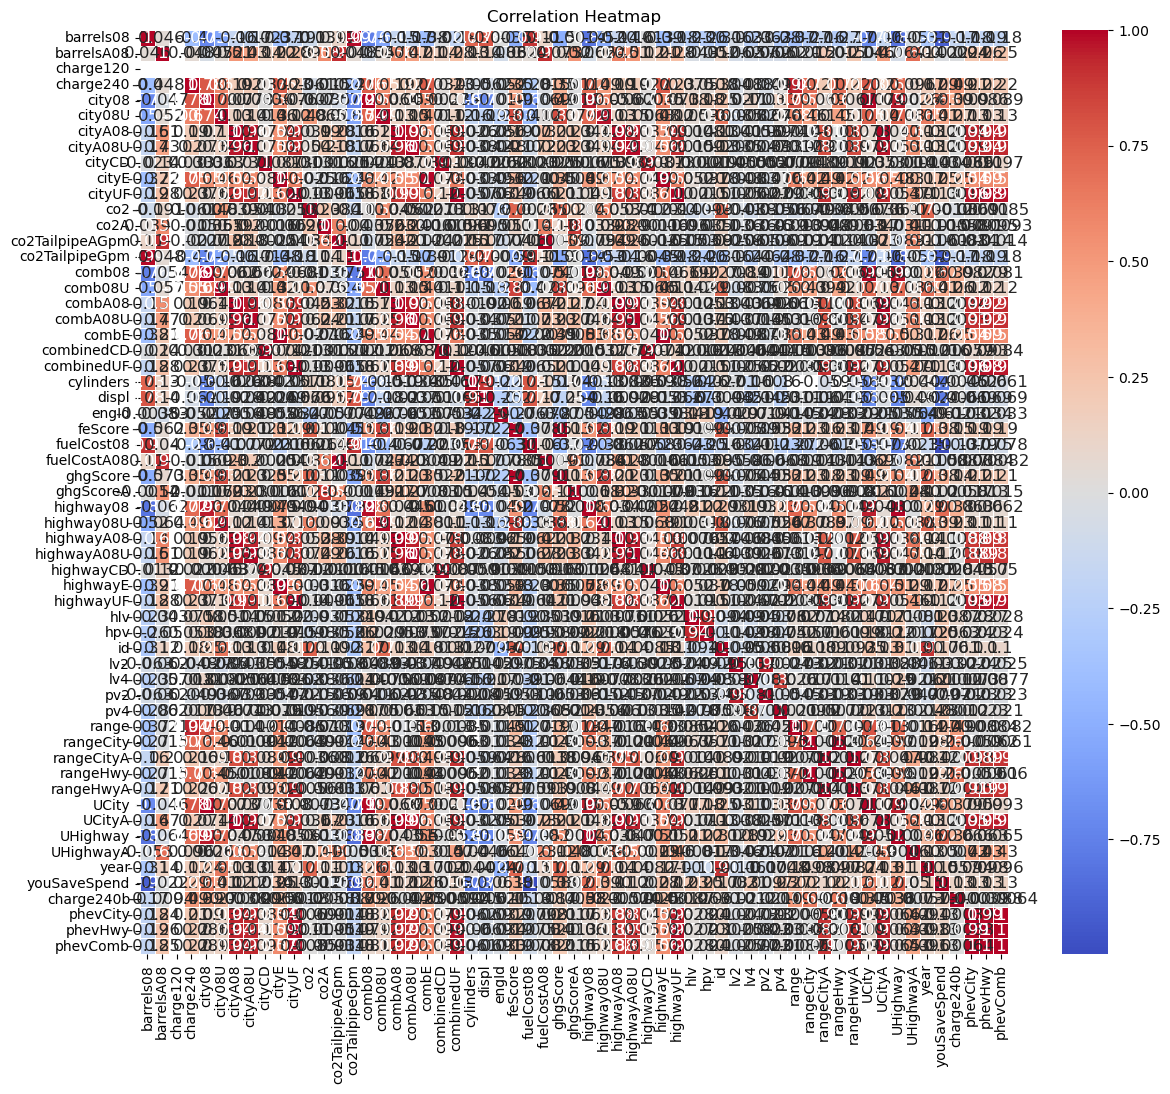

In [ ]:
# Loading our dataset
df = pd.read_csv('vehicles.csv')

# Selecting numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation_matrix = numeric_cols.corr()

# Creating a larger heatmap with larger font size for annotations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap isnt so clear probably because there are lots of variables existing and we agree to focus on only cvariables that really influence the fuel consumption

In [ ]:
# Listing important columns for predicting fuel consumption
important_columns = [
    'cylinders', 'displ', 'city08', 'highway08', 'co2', 'co2TailpipeGpm',
    'comb08', 'drive', 'year', 'trany'
]

# Droping the columns that are not in the list of important columns
data = data[important_columns]

# Now our dataframe contains only the selected important columns


In [ ]:
important_columns

['cylinders',
 'displ',
 'city08',
 'highway08',
 'co2',
 'co2TailpipeGpm',
 'comb08',
 'drive',
 'year',
 'trany']

In [ ]:
data.head()

,cylinders,displ,city08,highway08,co2,co2TailpipeGpm,comb08,drive,year,trany
0,4.0,2.0,19,25,-1,423.190476,21,Rear-Wheel Drive,1985,Manual 5-spd
1,12.0,4.9,9,14,-1,807.909091,11,Rear-Wheel Drive,1985,Manual 5-spd
2,4.0,2.2,23,33,-1,329.148148,27,Front-Wheel Drive,1985,Manual 5-spd
3,8.0,5.2,10,12,-1,807.909091,11,Rear-Wheel Drive,1985,Automatic 3-spd
4,4.0,2.2,17,23,-1,467.736842,19,4-Wheel or All-Wheel Drive,1993,Manual 5-spd


creating a predictor column-Fuel consumption

In [ ]:
# Creating the 'fuel_consumption' column based on available columns
data['fuel_consumption'] = data['year'] / data['comb08']

# Printing the head of the DataFrame with 'fuel_consumption' column
data.head()


,cylinders,displ,city08,highway08,co2,co2TailpipeGpm,comb08,drive,year,trany,fuel_consumption
0,4.0,2.0,19,25,-1,423.190476,21,Rear-Wheel Drive,1985,Manual 5-spd,94.523810
1,12.0,4.9,9,14,-1,807.909091,11,Rear-Wheel Drive,1985,Manual 5-spd,180.454545
2,4.0,2.2,23,33,-1,329.148148,27,Front-Wheel Drive,1985,Manual 5-spd,73.518519
3,8.0,5.2,10,12,-1,807.909091,11,Rear-Wheel Drive,1985,Automatic 3-spd,180.454545
4,4.0,2.2,17,23,-1,467.736842,19,4-Wheel or All-Wheel Drive,1993,Manual 5-spd,104.894737


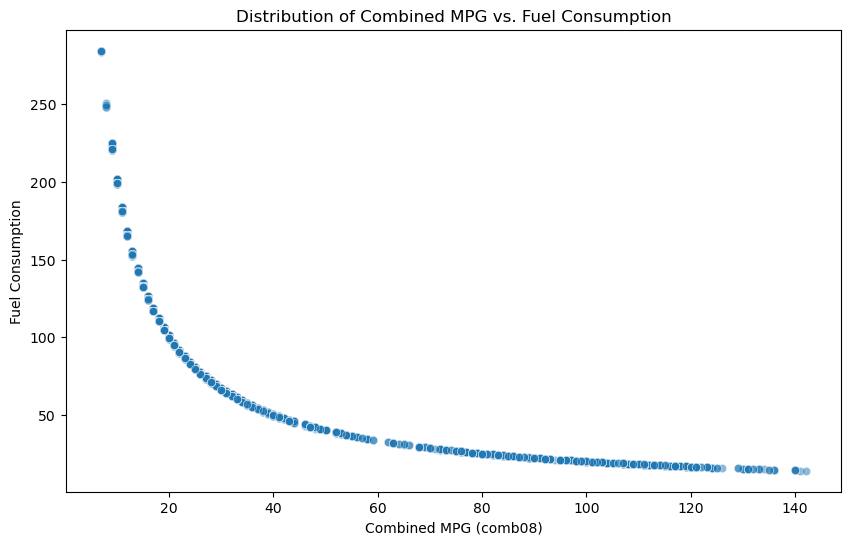

In [ ]:
# Create a scatter plot of 'comb08' vs. 'fuel_consumption'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='comb08', y='fuel_consumption', alpha=0.5)
plt.title('Distribution of Combined MPG vs. Fuel Consumption')
plt.xlabel('Combined MPG (comb08)')
plt.ylabel('Fuel Consumption')
plt.show()

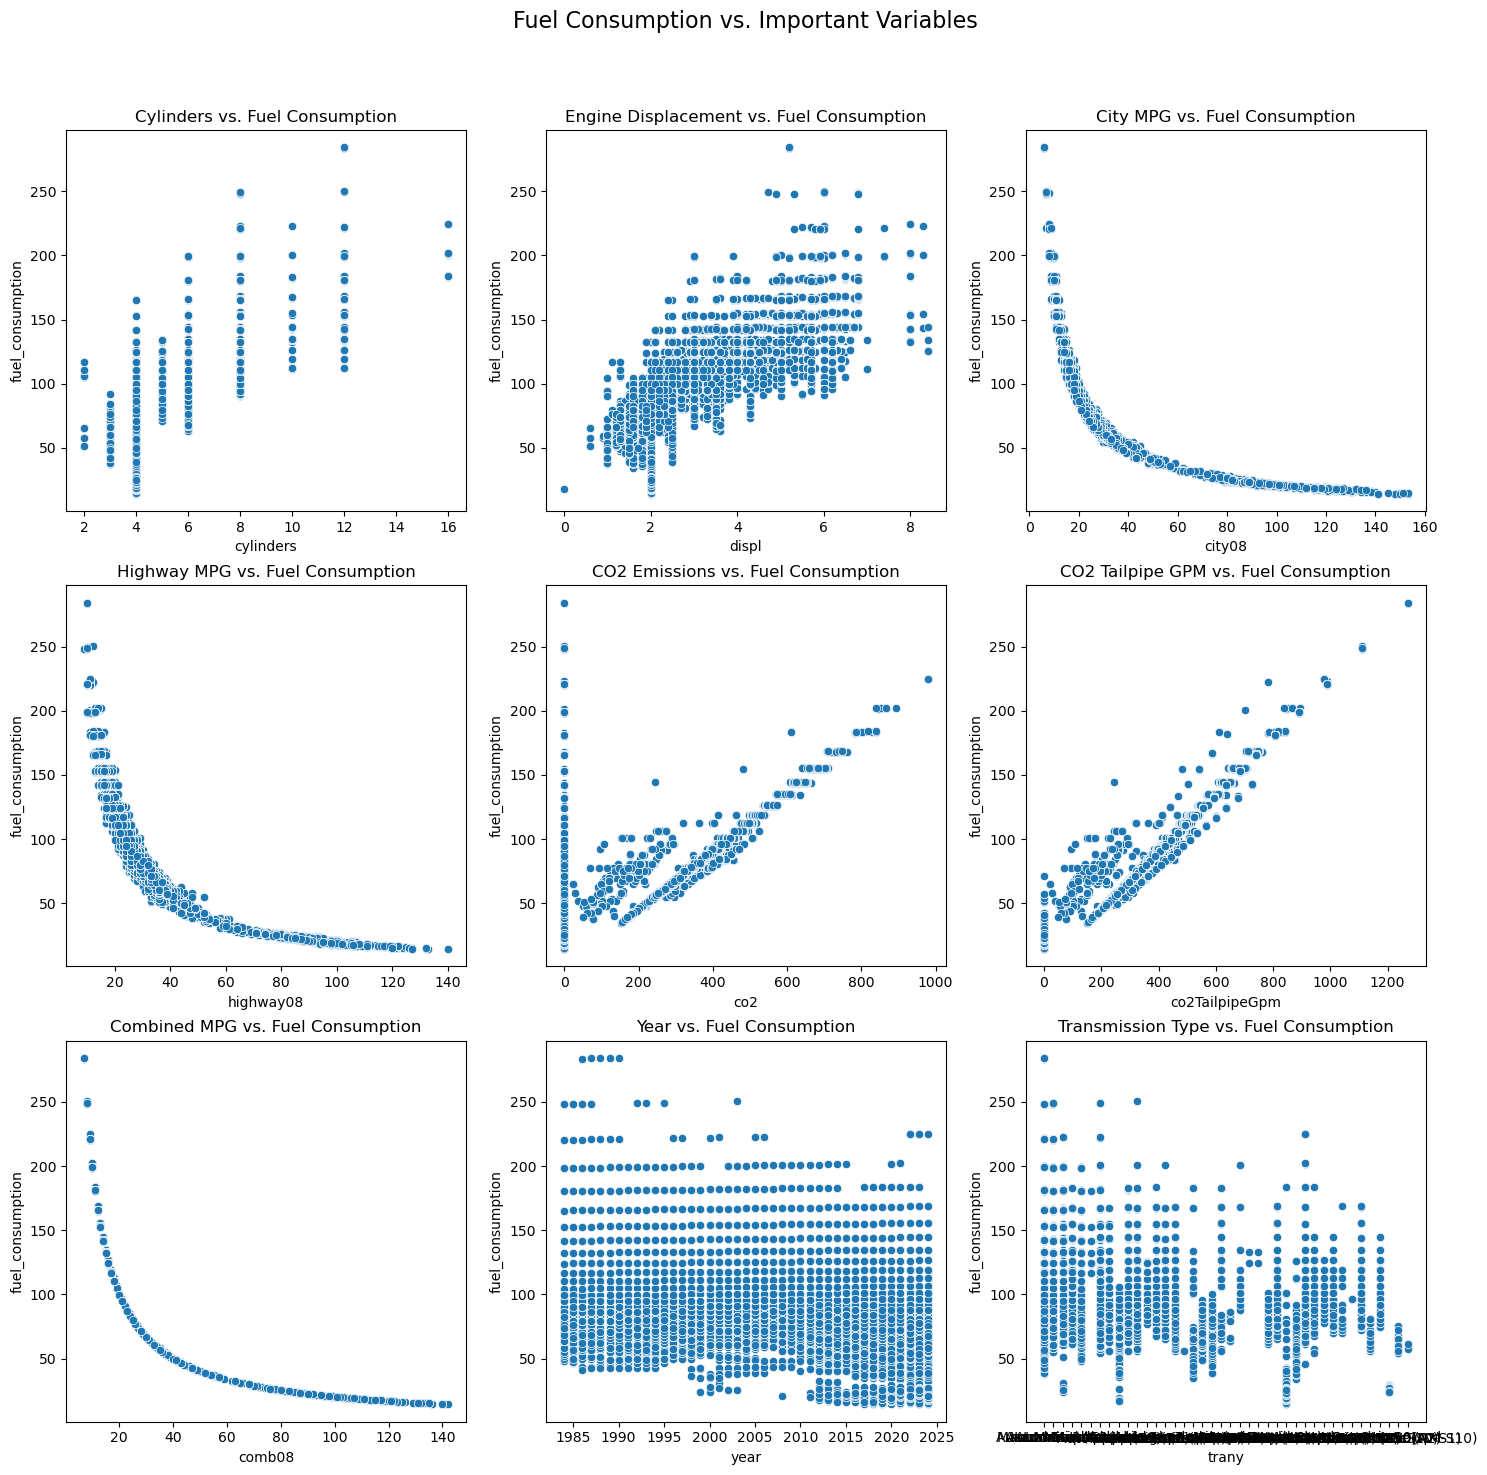

In [ ]:
# Creating subplots for each variable
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Fuel Consumption vs. Important Variables', fontsize=16)

# Scatter plots for each variable
sns.scatterplot(data=data, x='cylinders', y='fuel_consumption', ax=axes[0, 0])
axes[0, 0].set_title('Cylinders vs. Fuel Consumption')

sns.scatterplot(data=data, x='displ', y='fuel_consumption', ax=axes[0, 1])
axes[0, 1].set_title('Engine Displacement vs. Fuel Consumption')

sns.scatterplot(data=data, x='city08', y='fuel_consumption', ax=axes[0, 2])
axes[0, 2].set_title('City MPG vs. Fuel Consumption')

sns.scatterplot(data=data, x='highway08', y='fuel_consumption', ax=axes[1, 0])
axes[1, 0].set_title('Highway MPG vs. Fuel Consumption')

sns.scatterplot(data=data, x='co2', y='fuel_consumption', ax=axes[1, 1])
axes[1, 1].set_title('CO2 Emissions vs. Fuel Consumption')

sns.scatterplot(data=data, x='co2TailpipeGpm', y='fuel_consumption', ax=axes[1, 2])
axes[1, 2].set_title('CO2 Tailpipe GPM vs. Fuel Consumption')

sns.scatterplot(data=data, x='comb08', y='fuel_consumption', ax=axes[2, 0])
axes[2, 0].set_title('Combined MPG vs. Fuel Consumption')

sns.scatterplot(data=data, x='year', y='fuel_consumption', ax=axes[2, 1])
axes[2, 1].set_title('Year vs. Fuel Consumption')

sns.scatterplot(data=data, x='trany', y='fuel_consumption', ax=axes[2, 2])
axes[2, 2].set_title('Transmission Type vs. Fuel Consumption')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Showing the plots
plt.show()

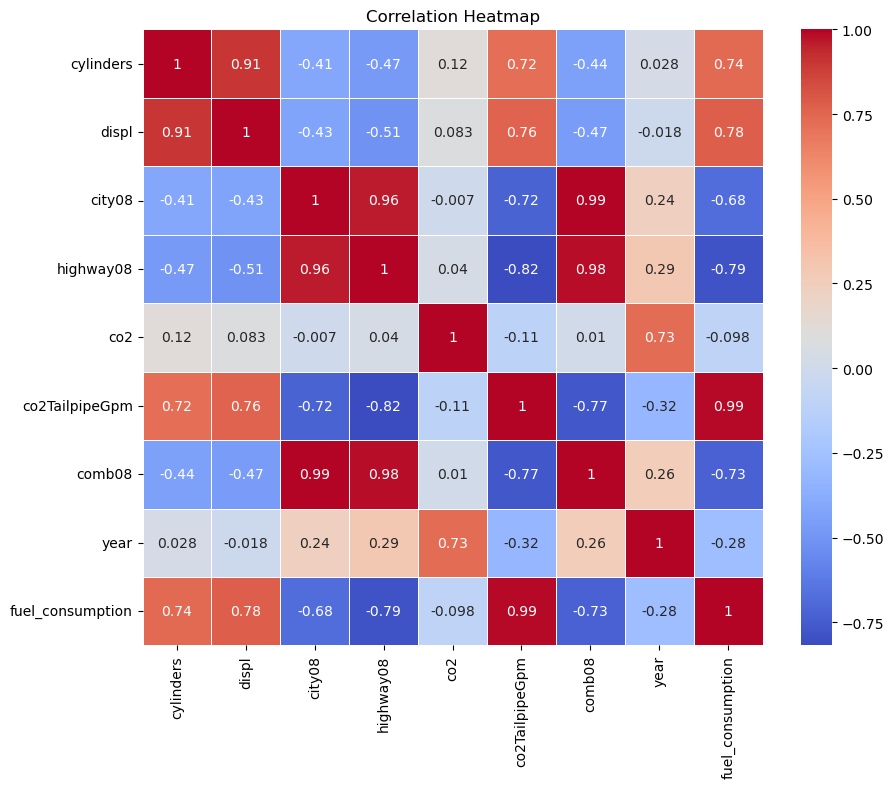

In [ ]:
# Selecting the variables we want to include in the correlation heatmap
variables = ['cylinders', 'displ', 'city08', 'highway08', 'co2', 'co2TailpipeGpm', 'comb08', 'year', 'fuel_consumption']

# Creating a correlation matrix for the selected variables
correlation_matrix = data[variables].corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
categorical_variables = data.select_dtypes(include=['object']).columns
print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
Index(['drive', 'trany'], dtype='object')


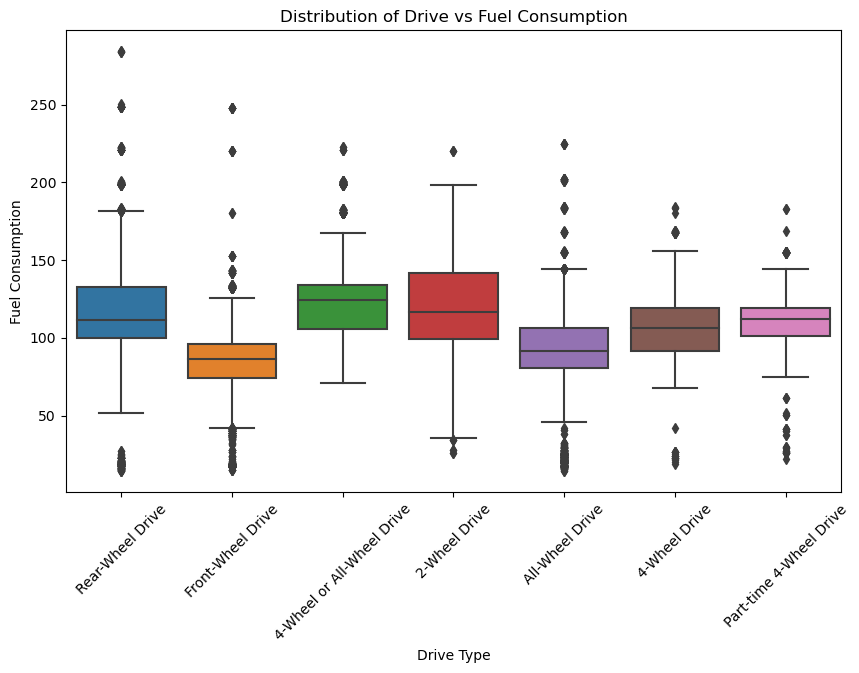

In [ ]:
#box plot of distribution of drive againts fuel consumption
plt.figure(figsize=(10, 6))
sns.boxplot(x='drive', y='fuel_consumption', data=data)
plt.title('Distribution of Drive vs Fuel Consumption')
plt.xlabel('Drive Type')
plt.ylabel('Fuel Consumption')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

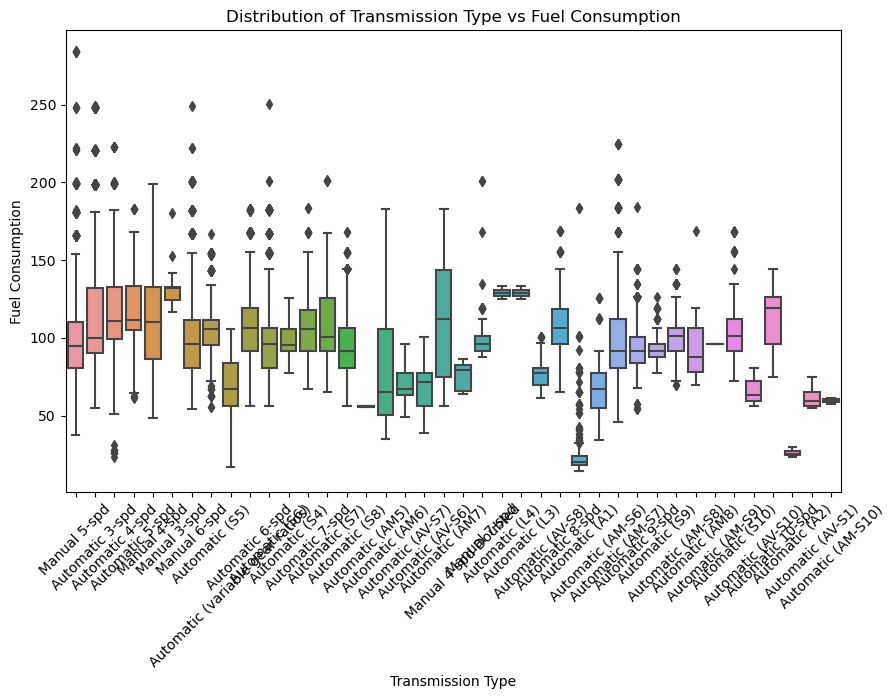

In [ ]:
#box plot of distribution of transmission against fuel consumption
plt.figure(figsize=(10, 6))
sns.boxplot(x='trany', y='fuel_consumption', data=data)
plt.title('Distribution of Transmission Type vs Fuel Consumption')
plt.xlabel('Transmission Type')
plt.ylabel('Fuel Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
import scipy.stats as stats

# Defining the lower and upper percentiles for Winsorizing
lower_percentile = 5
upper_percentile = 95

# List of continuous variables
continuous_variables = ['cylinders', 'displ', 'city08', 'highway08', 'co2', 'co2TailpipeGpm', 'comb08', 'year']

# Applying Winsorizing to each continuous variable
for variable in continuous_variables:
    data[f'{variable}_winsorized'] = stats.mstats.winsorize(data[variable], limits=(lower_percentile/100, upper_percentile/100))

# Now, we have new variables with outliers removed


In [ ]:
# List of continuous variables
continuous_variables = ['cylinders', 'displ', 'city08', 'highway08', 'co2', 'co2TailpipeGpm', 'comb08', 'year']

# Creating a list to store the results
outlier_check = []

# Checking for outliers before and after Winsorizing
for variable in continuous_variables:
    original_mean = data[variable].mean()
    original_std = data[variable].std()
    
    winsorized_mean = data[f'{variable}_winsorized'].mean()
    winsorized_std = data[f'{variable}_winsorized'].std()
    
    outliers_present = (data[variable] > original_mean + 3 * original_std) | (data[variable] < original_mean - 3 * original_std)
    outliers_removed = (data[f'{variable}_winsorized'] > winsorized_mean + 3 * winsorized_std) | (data[f'{variable}_winsorized'] < winsorized_mean - 3 * winsorized_std)
    
    outlier_check.append({'Variable': variable, 'Outliers Present': outliers_present.any(), 'Outliers Removed': outliers_removed.any()})

# Create a DataFrame from the list
outlier_check_df = pd.DataFrame(outlier_check)

# Print the results
print(outlier_check_df)


         Variable  Outliers Present  Outliers Removed
0       cylinders              True             False
1           displ              True             False
2          city08              True             False
3       highway08              True             False
4             co2              True             False
5  co2TailpipeGpm              True             False
6          comb08              True             False
7            year             False             False


In [ ]:
import statsmodels.api as sm

# Select the independent variables (predictors) and the dependent variable (fuel consumption)
independent_vars = data[['cylinders', 'displ', 'city08', 'highway08', 'co2', 'comb08', 'year']]
dependent_var = data['fuel_consumption']

# Add a constant (intercept) to the independent variables
independent_vars = sm.add_constant(independent_vars)

# Fit the multiple linear regression model
model = sm.OLS(dependent_var, independent_vars).fit()

# Get the summary of the regression
summary = model.summary()

# Print the summary, including coefficients and p-values
print(summary)


                            OLS Regression Results                            
Dep. Variable:       fuel_consumption   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 4.134e+04
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:25:52   Log-Likelihood:            -1.7633e+05
No. Observations:               46839   AIC:                         3.527e+05
Df Residuals:                   46831   BIC:                         3.528e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        376.4617     12.275     30.668      0.0

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Creating a formula for the ANOVA
formula = "fuel_consumption ~ C(drive) + C(trany)"

# Fitting the ANOVA model
model = ols(formula, data=data).fit()

# Getting the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Printing the ANOVA results
print(anova_table)


                sum_sq       df            F  PR(>F)
C(drive)  8.916057e+06      6.0  3855.529735     0.0
C(trany)  7.213329e+06     39.0   479.881066     0.0
Residual  1.803509e+07  46793.0          NaN     NaN


In [ ]:
# with the names of the continuous variables we want to include in the correlation analysis.
continuous_vars = ['cylinders', 'displ', 'city08', 'highway08', 'co2', 'comb08']

# Calculate the correlation matrix
correlation_matrix = data[continuous_vars + ['fuel_consumption']].corr()

# Extract the correlation of 'fuel_consumption' with other variables
fuel_consumption_correlation = correlation_matrix['fuel_consumption']

# Print the correlation values
print(fuel_consumption_correlation)

cylinders           0.738573
displ               0.777805
city08             -0.680943
highway08          -0.789554
co2                -0.097742
comb08             -0.732393
fuel_consumption    1.000000
Name: fuel_consumption, dtype: float64


In [ ]:
predictDF = pd.get_dummies(data,columns=['drive','trany'],drop_first=True)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['drive']= le.fit_transform(data['drive'])
data['trany']= le.fit_transform(data['trany'])

data.head()

,cylinders,displ,city08,highway08,co2,co2TailpipeGpm,comb08,drive,year,trany,fuel_consumption,cylinders_winsorized,displ_winsorized,city08_winsorized,highway08_winsorized,co2_winsorized,co2TailpipeGpm_winsorized,comb08_winsorized,year_winsorized
0,4.0,2.0,19,25,-1,423.190476,21,6,1985,37,94.523810,4.0,1.6,11,16,-1,282.777778,13,1985
1,12.0,4.9,9,14,-1,807.909091,11,6,1985,37,180.454545,4.0,1.6,11,16,-1,282.777778,13,1985
2,4.0,2.2,23,33,-1,329.148148,27,4,1985,37,73.518519,4.0,1.6,11,16,-1,282.777778,13,1985
3,8.0,5.2,10,12,-1,807.909091,11,6,1985,27,180.454545,4.0,1.6,11,16,-1,282.777778,13,1985
4,4.0,2.2,17,23,-1,467.736842,19,2,1993,37,104.894737,4.0,1.6,11,16,-1,282.777778,13,1985


#### Spliting of data

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target variable (y)
X = data[['cylinders', 'displ', 'city08', 'highway08', 'co2TailpipeGpm', 'comb08', 'year', 'drive', 'trany']]
y = data['fuel_consumption']

# Splitting the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, we have X_train, X_test, y_train, and y_test with the adjusted feature set for model training and evaluation.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a Linear Regression model
linear_reg_model = LinearRegression()

# Fitting the model on the training data
linear_reg_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2) Score: {r2_linear}")


Linear Regression Model:
Mean Squared Error (MSE): 16.584467959342074
R-squared (R2) Score: 0.9791026613525632


The results for the Linear Regression Model are as follows:

Mean Squared Error (MSE): 16.5845

MSE measures the average squared difference between the actual fuel consumption values and the predicted values. In this case, the MSE is relatively low (16.5845), indicating that the model's predictions are close to the actual values on average.
R-squared (R2) Score: 0.9791

R-squared is a measure of how well the independent variables (features) explain the variance in the dependent variable (fuel consumption). The R-squared score ranges from 0 to 1, where 1 indicates a perfect fit. In this case, the R-squared score is 0.9791, which is very close to 1. This means that the linear regression model explains approximately 97.91% of the variance in fuel consumption. It indicates a strong relationship between the features and the target variable, suggesting that the model is a good fit for the data.
These results suggest that the Linear Regression Model is performing very well, with low prediction errors and a high level of variance explained. It's a good indicator that the model is capable of accurately predicting fuel consumption based on the selected features

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2) Score: {r2_rf}")



Random Forest Regressor Model:
Mean Squared Error (MSE): 0.00019284276380258735
R-squared (R2) Score: 0.9999997570075476


The results for the Random Forest Regressor Model are as follows:

Mean Squared Error (MSE): 0.0001928

The MSE measures the average squared difference between the actual fuel consumption values and the predicted values. In this case, the MSE is extremely low, which means that the model's predictions are very close to the actual values on average. The low MSE indicates high accuracy in prediction.
R-squared (R2) Score: 0.9999998

The R-squared score represents the goodness of fit of the model. It ranges from 0 to 1, with 1 indicating a perfect fit. In this case, the R-squared score is exceptionally close to 1 (0.9999998), which means the model explains almost all the variance in the fuel consumption. This indicates an almost perfect fit of the model to the data.
These results suggest that the Random Forest Regressor Model is performing exceptionally well. The model has an extremely low mean squared error and an almost perfect R-squared score, indicating that it provides highly accurate predictions and captures almost all the variance in fuel consumption. This makes it a very strong candidate for predicting fuel consumption based on the selected features.




